<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2</font></h1>
<h3 align=center>Statistical Treatment for Datasets</h3>

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?


## Data Preparation

### Import Pustaka

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

### Load Data

In [33]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')

### Data Overview

In [34]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [35]:
df.shape

(84548, 22)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

### Data Cleaning
Berdasarkan deskripsi data dan cuplikan data, diketahui bahwa terdapat 2 kolom yang tidak digunakan yaitu Easement dan Unnamed:0

In [37]:
df = df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1)

In [38]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


#### Handle Missing Values

In [41]:
print('Column name :')
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].nunique())

Column name :
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [42]:
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer:
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [43]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Sekitar 30% dari fitur GROSS SF dan LAND SF merupakan missing value. Sekitaf 17% dari SALE PRICE juga missing. Isi dengan nilai dari kolom lain.

In [44]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


Terdapat 1372 rows yang dapat diisi dengan nilai approksimasi

#### Handle Duplicate Values

In [46]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [47]:
print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


In [48]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory Data Analysis

### Simple Descriptive Statistics

#### Statistics COMMERCIAL UNITS

In [52]:
df['COMMERCIAL UNITS'].describe()

count    83783.000000
mean         0.183677
std          8.576582
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2261.000000
Name: COMMERCIAL UNITS, dtype: float64

In [27]:
df[df['COMMERCIAL UNITS'] == 0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


**Insight**

- Terdapat zip_code yang bernilai 0
- Fitur BLOCK nilainya mencapai maksimum 16322 dengan minimum 1
- Kebanyakan properti memiliki 1 hingga 2 unit dengan maksimum 889 unit. Perlu diperhatikan karena dapat menjadi pencilan.
- Fitur Year memiliki nilai 0 yang seharusnya merupakan nilai yang tidak valid

#### Statistics RESIDENTIAL UNITS

In [53]:
df['RESIDENTIAL UNITS'].describe()

count    83783.000000
mean         1.999976
std         16.569118
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       1844.000000
Name: RESIDENTIAL UNITS, dtype: float64

In [54]:
df[df['RESIDENTIAL UNITS'] == 0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


**Insight**

- Masih terdapat ZIP_code yang bernilai 0
- Fitur BLOCK nilainya mencapai maksimum 16317 dengan minimum 1, dan terpusat di angka +- 2000
- Kebanyakan properti memiliki 1 hingga 2 unit dengan maksimum 2261 unit. Perlu diperhatikan karena dapat menjadi pencilan.

#### Data Cleaning
Hapus data dengan LAND SQUARE FIT = 0, GROSS SQUARE FEET = 0, YEAR BUILT < 1700, SALE PRICE < 5000, TOTAL UNITS = 0, ZIP CODE = 0

In [108]:
df = df[(df['LAND SQUARE FEET'] != 0) & (df['GROSS SQUARE FEET'] != 0) & (df['YEAR BUILT'] > 1700) & (df['SALE PRICE'] > 5000) & (df['TOTAL UNITS'] != 0) & (df['ZIP CODE'] != 0)]

#### Distribusi BOROUGH

In [119]:
BOROUGHS = df['BOROUGH'].unique()

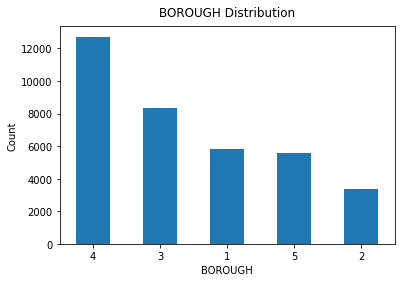

In [109]:
df['BOROUGH'].value_counts().plot(kind='bar');

plt.title('BOROUGH Distribution', pad=10)
plt.xlabel('BOROUGH')
plt.ylabel('Count')

plt.xticks(rotation = 0)

plt.show();

## Measure of Central Tendency

### Mean

In [110]:
df.groupby(['BOROUGH']).mean()['SALE PRICE']

BOROUGH
1    5.979290e+06
2    1.055756e+06
3    1.558991e+06
4    9.041606e+05
5    5.214526e+05
Name: SALE PRICE, dtype: float64

Terlihat bahwa nilai mean dari SALE PRICE untuk setiap BOROUGH cukup berbeda secara signifikan. Daerah 1 memiliki kecenderungan harga rumah yang lebih mahal sedangkan Daerah 5 memiliki kecenderungan harga rumah lebih murah. Hal ini perlu dianalisis lebih jauh untuk melihat distribusinya.

### Median

In [111]:
df.groupby(['BOROUGH']).median()['SALE PRICE']

BOROUGH
1    1933650.0
2     490000.0
3     880000.0
4     640000.0
5     475000.0
Name: SALE PRICE, dtype: float64

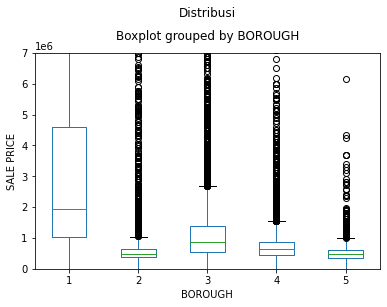

In [114]:
disp = df.boxplot(by ='BOROUGH', column=['SALE PRICE'], grid = False);
plt.ylim(0, 7000000)

plt.title('Distribusi', pad=10, y=1.12)
plt.xlabel('BOROUGH')
plt.ylabel('SALE PRICE')

plt.show();

Seperti yang terlihat pada mean, nilai median dari SALE PRICE untuk setiap BOROUGH cukup berbeda secara signifikan. Namun yang menarik adalah jika nilai mean Daerah 5 jauh lebih kecil dibanding yang lain, pada media nilainya hampir sama kecuali dengan Daerah 1 yang memang perbedaannya signifikan dengan yang lain.

Dari BOXPLOT juga terlihat jelas distribusi media yang mirip antara daerah 2, 3, 4, dan 5. Banyaknya pencilan atau outlier pada kelas 2, 3, 4 kemungkinan yang membuat nilai mean yang tadi didapatkan kurang merepresentasikan data.

### Mode

In [121]:
for BOROUGH in BOROUGHS:
    print(f"BOROUGH {BOROUGH}\t{df[df['BOROUGH'] == BOROUGH]['SALE PRICE'].mode()[0]}")

BOROUGH 1	1300000.0
BOROUGH 2	500000.0
BOROUGH 3	1300000.0
BOROUGH 4	650000.0
BOROUGH 5	450000.0


Hal menarik yang ditemukan dari nilai modus tersebut adalah daerah 3 yang nilai modusnya sama dengan daerah 1 yang mana jika dilihat dengan mean dan median nilainya cukup berbeda secara signifikan.

## Measure of Variability

### Range

In [131]:
print(f"BOROUGH NO\tMIN\tMAX\t\tRANGE") 
print()

for BOROUGH in BOROUGHS:
    minx = df[df['BOROUGH'] == BOROUGH]['SALE PRICE'].min()
    maxx = df[df['BOROUGH'] == BOROUGH]['SALE PRICE'].max()
    
    print(f"BOROUGH {BOROUGH}\t{minx}\t{maxx}\t{maxx-minx}")

BOROUGH NO	MIN	MAX		RANGE

BOROUGH 1	5500.0	2210000000.0	2209994500.0
BOROUGH 2	6500.0	110000000.0	109993500.0
BOROUGH 3	6500.0	154250000.0	154243500.0
BOROUGH 4	6000.0	257500000.0	257494000.0
BOROUGH 5	5700.0	11900000.0	11894300.0


BOROUGH 1 memiliki nilai range yang jauh lebih besar dibandingkan dengan BOROUGH lainnya. Artinya dapat dimungkinkan persebaran harga properti pada BOROUGH 1 lebih luas mulai dari yang murah sampai yang sangat mahal. Di lain sisi, BOROUGH 5 memiliki nilai range yang lebih kecil dari yang lain dan perbandingannya cukup jauh. 

Insight ini namun sangat rentan terhadap outlier.

### Variance

In [138]:
df.groupby(['BOROUGH']).var()['SALE PRICE']

BOROUGH
1    1.398461e+15
2    1.489464e+13
3    2.310680e+13
4    1.206130e+13
5    2.100646e+11
Name: SALE PRICE, dtype: float64

Berdasarkan nilai variance, lebih terlihat lagi perbedaan distribusi antara BOROUGH 1, BOROUGH 234, dan BOROUGH 5. BOROUGH 1 memiliki persebaran yang lebih luas. BOROUGH 5 memiliki rentang harga yang lebih sempit.

### Standard Deviation

In [136]:
df.groupby(['BOROUGH']).std()['SALE PRICE']

BOROUGH
1    3.739601e+07
2    3.859358e+06
3    4.806953e+06
4    3.472938e+06
5    4.583280e+05
Name: SALE PRICE, dtype: float64

Kesimpulan yang dapat diambil sama seperti yang terdapat pada variance, namun nilai SD lebih representatif karena levelnya sama dengan harga. Jika dilihat dari nilainya jangkauan harga properti memang sangat tinggi.

### Quartile

In [147]:
print(f"BOROUGH NO\tQ1\t\tQ2\t\tQ3") 
print()

for BOROUGH in BOROUGHS:
    minx = df[df['BOROUGH'] == BOROUGH]['SALE PRICE'].quantile([0.25, 0.50, 0.75])
    print(f"BOROUGH {BOROUGH}\t{minx[0.25]}\t{minx[0.50]}\t{minx[0.75]}")

BOROUGH NO	Q1		Q2		Q3

BOROUGH 1	1024750.0	1933650.0	4582125.0
BOROUGH 2	367500.0	490000.0	637000.0
BOROUGH 3	550000.0	880000.0	1400000.0
BOROUGH 4	440000.0	640000.0	880000.0
BOROUGH 5	350000.0	475000.0	610000.0


Dari nilai quartil 1 dan quartil 3 juga dapat dilihat variabilitas dari data. Hal ini lebih representatif dibanding range yang sangat rentan akan outlier. Namun kesimpulan yang dapat diambil cenderung sama. Tren yang ditunjukan Q1-Q3 atau simpangan interquartil lebih mirip dengan SD dibanding Range. Memang data yang dimiliki cenderung memiliki banyak outlier.

## Probability Distribution

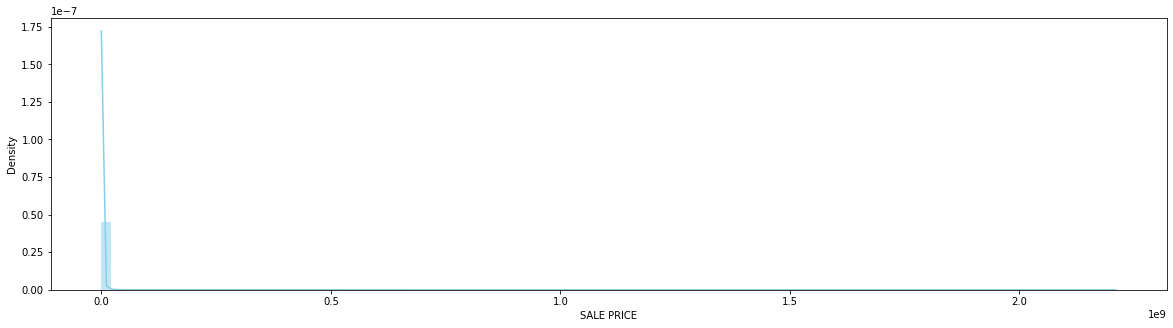

In [184]:
plt.figure(figsize=(20, 5))

sns.histplot(df['SALE PRICE'], color="skyblue", bins=100, kde=True, stat="density", linewidth=0);

plt.show()

Distribusi sangat tidak terlihat karena sangat condong ke kiri. Hal ini diprediksi sebagai akibat banyaknya outlier. Oleh karena itu coba dilakukan penghapusan outlier.

#### Remove Outlier Using Z-Score

In [185]:
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df['SALE PRICE'])).sort_values()
filtered = z < 3
# df.loc[filtered, :]

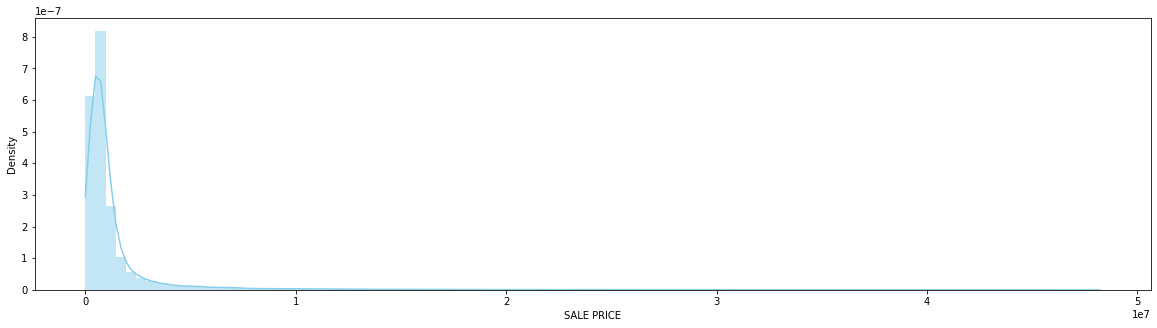

In [183]:
plt.figure(figsize=(20, 5))

sns.histplot(df.loc[filtered, :]['SALE PRICE'], color="skyblue", bins=100, kde=True, stat="density", linewidth=0);

plt.show()

Setelah outlier dengan z-score > 3 dihapus, distribusi SALE PRICE menjadi lebih normal secara visual. Distribusi terlihat miring ke ke kiri sehingga termasuk sangat skew positive.

Dari bentuknya distribusi diprediksi terdistribusi dalam bentuk gamma distribution atau juga bisa eksponensial.

## Confidence Interval

In [187]:
df.groupby(['BOROUGH']).agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                 mean           std   size
BOROUGH                                   
1        5.979290e+06  3.739601e+07   5844
2        1.055756e+06  3.859358e+06   3397
3        1.558991e+06  4.806953e+06   8326
4        9.041606e+05  3.472938e+06  12722
5        5.214526e+05  4.583280e+05   5561

In [191]:
mean_borough_1 = 5.979290e+06
std_borough_1 = 3.739601e+07
n = df.shape[0]
z = 1.96

In [192]:
se = std_borough_1 / np.sqrt(n)

In [193]:
lcb = mean_borough_1 - z * se
ucb = mean_borough_1 + z * se

In [194]:
lcb, ucb

(5592177.889052445, 6366402.110947555)

Confidence interval untuk harga properti pada daerah borough 1 akan jatuh antara **5.592.177** hingga **6.366.402**

## Hipotesis Testing

### Pernyataan Hipotesis
Proporsi properti yang terdapat pada BOROUGH 1 yang berada diatas 6.000.000 dollar kurang dari 20% dari seluruh properti pada BOROUGH 1.

#### 1. Define null hypothesis and alternative hypothesis

**null hypothesis** : proporsi properti yang terdapat pada BOROUGH 1 yang berada diatas 6.000.000 dollar lebih dari sama dengan 20% dari seluruh properti pada BOROUGH 1.

p_null >= 0.2

**alternative hypothesis** : proporsi properti yang terdapat pada BOROUGH 1 yang berada diatas 6.000.000 dollar kurang dari 20% dari seluruh properti pada BOROUGH 1.

p_alt < 0.2

In [196]:
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [206]:
p_over = df[(df['BOROUGH'] == 1) & (df['SALE PRICE'] > 6000000)].shape[0] / df[df['BOROUGH'] == 1].shape[0]
p_over

0.18839835728952772

Populasi proporsi sampel properti yang terdapat pada BOROUGH 1 yang berada diatas 6.000.000 dollar adalah **18.8%**

Nilai yang didapatkan kurang dari null hypothesis. Namun diperlukan pengamatan signifikansi.

In [208]:
se = np.sqrt(0.20 * (1 - 0.20) / df[df['BOROUGH'] == 1].shape[0])
se

0.005232447598526049

In [210]:
test_stat = (p_over - 0.20) / se
test_stat

-2.2172496698754145

In [211]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

In [212]:
pvalue

0.026606035106510082

pvalue nilainya lebih rendah dibandingkan dengan significance level 5%. Jadi null hypothesis dapat ditolak. Dan dapat disimpulkan Proporsi properti yang terdapat pada BOROUGH 1 yang berada diatas 6.000.000 dollar kurang dari 20% dari seluruh properti pada BOROUGH 1.

## Kesimpulan

Statistika descriptive dan inferensial memiliki manfaat yang sangat luas. Mulai dari statistika deskriptif yang dapat menjadi bahan pengenalan terhadap data dengan analisis pengukuran central tendency serta variabilitasnya, hingga statistika inferensial yang dapat membantu dalam pembuatan keputusan berdasarkan data sehingga teruji secara sains.